# 1. Introduction

*   An experimental drug was tested on people ages 13 - 65.
*   The trial had 2100 participants. Half were under 65 and half were over 65
* 95% of people 65 or older experienced side effects
* 95% of people under 65 experienced no side effects



In [ ]:
# importing libraries
import numpy as np # data manipulation
from random import randint # random number generator
from sklearn.preprocessing import MinMaxScaler # data scaler

In [ ]:
# lists for our data
train_labels = []
train_samples = []

In [ ]:
# generating fake data

# this loop creates 100 patients
for i in range(50):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)

# this for loop creates 2000 patients
for i in range(1000):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0) # 0 is no side effects

  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1) # 1 is side effects

In [ ]:
# for i in train_samples:
#   print(i)

# 2. Pre-Processing Data

In [ ]:
# keras expects training labels and samples to be in np arrays

train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [ ]:
# Our network model will see increased performance from scaling our data
# MinMax chosen arbitrarily
scaler = MinMaxScaler(feature_range=(0,1))

# scaler.fit_transform requires 2d arrays so train_samples is reshaped using (-1,1) to indicate 1d array with n rows and 1 column
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [ ]:
# for i in scaled_train_samples:
#   print(i)

# 3. Creating an ANN

In [ ]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [ ]:
# sequential is a linear stack of layers

# layer types, number of layers, number of neurons, and activation f'n chosen arbitrarily
model = Sequential([
                    # 16 neurons, shape of data array 1d, activation f'n
                    Dense(units=16, input_shape=(1,), activation='relu'),
                    Dense(32,activation='relu'),
                    # We have 2 classes (yes/no reaction) so units = 2
                    Dense(2,activation='softmax')
])

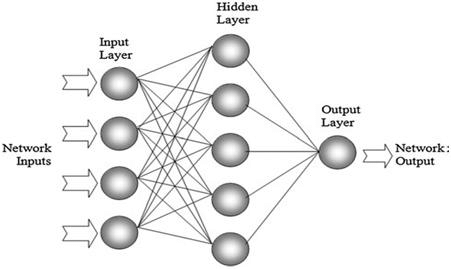

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                32        
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## 4. Training an ANN

In [ ]:
# configure training parameters for your model
# parameters chosen arbitrarily
model.compile(
    # set learning rate for model using Adam Optimizer
    Adam(learning_rate=.0001),
    # choose a loss function
    loss = 'sparse_categorical_crossentropy',
    # choose a method to evaluate your model
    metrics=['accuracy'])

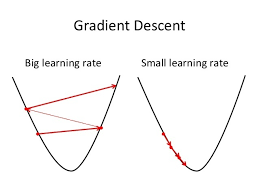

In [ ]:
# model.fit(
#     # sample data
#     scaled_train_samples,
#     # training labels
#     train_labels,
#     # number of data points fed to the model at once
#     batch_size=10,
#     # number of passes the model takes through the entire dataset
#     epochs=20,
#     # data is passed through model differently each epoch
#     shuffle=True,
#     # shows how model improves in each epoch
#     verbose=2)

# 5. Validation

In [ ]:
# creating a validation set in keras is simple
# validation sets prevent overfitting to the training data
model.fit(
    scaled_train_samples,
    train_labels,
    # create a validation set as a fraction of our training data
    # In this case, take the last 10% of training data as validation set
    validation_split = 0.1,
    batch_size=10,
    epochs=20,
    # validation set is always the same. It is not shuffled.
    shuffle=True,
    verbose=2)

Epoch 1/20
189/189 - 1s - loss: 0.7127 - accuracy: 0.4095 - val_loss: 0.6872 - val_accuracy: 0.5000 - 1s/epoch - 5ms/step
Epoch 2/20
189/189 - 0s - loss: 0.6661 - accuracy: 0.5270 - val_loss: 0.6512 - val_accuracy: 0.5095 - 371ms/epoch - 2ms/step
Epoch 3/20
189/189 - 0s - loss: 0.6278 - accuracy: 0.5873 - val_loss: 0.6161 - val_accuracy: 0.6048 - 350ms/epoch - 2ms/step
Epoch 4/20
189/189 - 0s - loss: 0.5964 - accuracy: 0.6529 - val_loss: 0.5844 - val_accuracy: 0.6952 - 410ms/epoch - 2ms/step
Epoch 5/20
189/189 - 0s - loss: 0.5642 - accuracy: 0.7228 - val_loss: 0.5509 - val_accuracy: 0.7524 - 370ms/epoch - 2ms/step
Epoch 6/20
189/189 - 0s - loss: 0.5298 - accuracy: 0.7624 - val_loss: 0.5131 - val_accuracy: 0.7857 - 344ms/epoch - 2ms/step
Epoch 7/20
189/189 - 0s - loss: 0.4952 - accuracy: 0.7968 - val_loss: 0.4771 - val_accuracy: 0.8429 - 349ms/epoch - 2ms/step
Epoch 8/20
189/189 - 0s - loss: 0.4625 - accuracy: 0.8217 - val_loss: 0.4424 - val_accuracy: 0.8714 - 315ms/epoch - 2ms/step
Epo

# 6. Make Predictions

In [ ]:
# generating fake test data to use for our model to make predictions on
test_labels = []
test_samples = []

for i in range(10):
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)

  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(200):
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0) # 0 is no side effects

  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1) # 1 is side effects

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

In [ ]:
# Our model is now predicting what class our test data belongs to
predictions = model.predict(scaled_test_samples, batch_size=10,verbose=0)

In [ ]:
# print first 5 results from our model's predictions
for i in range(0,5):
  print(predictions[i])

[0.85435015 0.14564982]
[0.02557315 0.97442687]
[0.68578506 0.31421492]
[0.1629814 0.8370186]
[0.93768746 0.06231258]


model.predict returns a 2d array. Each numpy subarray contains the probabilities of a data point belonging to a specific class. In this case, for our first array we see there is a ~73% probability that the first data point belongs to class 0 or that the patient did not have a side effect, and that there is a ~27% that the patient did have a side effect (class 1).

In [ ]:
# We can also have our model make class predictions by using the highest probability
rounded_predictions = np.argmax(predictions, axis=-1)

# show first 5 results
for i in range(0,5):
  print(rounded_predictions[i])

0
1
0
1
0


# 7. Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
# function to create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
    else:
      print('Confusion matrix, without normalization')

      print(cm)
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation=45)
      plt.yticks(tick_marks, classes)
      fmt = '.2f' if normalize else 'd'
      thresh = cm.max() / 2.
      for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
      plt.tight_layout()
      plt.ylabel('True label')
      plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[181  29]
 [ 10 200]]


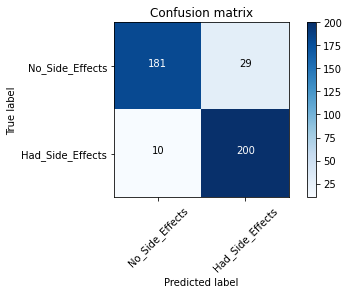

In [ ]:
# create a confusion matrix
cm = confusion_matrix(test_labels,rounded_predictions)
# labels for our matrix
cm_plot_labels = ['No_Side_Effects','Had_Side_Effects']
# plot
plot_confusion_matrix(cm, cm_plot_labels)

Interpretation of the Confusion Matrix

*   Top Left: 181 patients predicted to have no side effects and in reality did not have side effects
*   Top Right: 29 patients predicted to have side effects and in reality did not have side effects
*   Bottom Left: 10 patients predicted to have no side effects and in reality did have side effects
*   Bottom Right: 200 patients predicted to have side effects and in reality did have side effects


# 8. Saving a Model

In [ ]:
# You can save a model so you can use it in later projects!

# The path leading to the directory you want to save your model in
# if none specified then it's just saved to current directory
model_name = 'ANN.tf'
model.save(model_name)

INFO:tensorflow:Assets written to: ANN.tf/assets


In [ ]:
from keras.models import load_model
# load saved model
new_model = load_model('ANN.tf')
# Every detail of the model was saved
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                32        
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# saving a model in json only saved architecture of model not weights or various parameter settings
json_string = model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_2", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_6_input"}}, {"class_name": "Dense", "config": {"name": "dense_6", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_7", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "

In [ ]:
# reconstruct model from JSON file
from keras.models import model_from_json
model_architecture = model_from_json(json_string)
model_architecture.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                32        
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# You can save just the weights of the model
model.save_weights('model_weights.tf')
# new model where we will load our weights from previous model
model2 = Sequential([
                     Dense(16, input_shape=(1,),activation='relu'),
                     Dense(32,activation='relu'),
                     Dense(2, activation='softmax')
])
# load weights
model2.load_weights('model_weights.tf')

# 9. References

In [ ]:
# https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53
# https://www.youtube.com/watch?v=gZmobeGL0Yg&list=PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU